In [1]:
from transformers import T5Tokenizer, RobertaForMaskedLM

tokenizer = T5Tokenizer.from_pretrained("rinna/japanese-roberta-base")
tokenizer.do_lower_case = True  # due to some bug of tokenizer config loading

model = RobertaForMaskedLM.from_pretrained("rinna/japanese-roberta-base")

Downloading:   0%|          | 0.00/787k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/153 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/259 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/663 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

In [2]:
import torch 
from transformers import T5Tokenizer, RobertaForMaskedLM 
tokenizer = T5Tokenizer.from_pretrained("rinna/japanese-roberta-base") 
tokenizer.do_lower_case = True  # due to some bug of tokenizer config loading 
model = RobertaForMaskedLM.from_pretrained("rinna/japanese-roberta-base") 
# original text 
text = "子供にとって、ゲームは害になるのか？"
 
# prepend [CLS] 【注1】
text = "[CLS]" + text 
# tokenize 
tokens = tokenizer.tokenize(text) 
print(tokens) 
# mask a token 【注2】
masked_idx = 5
tokens[masked_idx] = tokenizer.mask_token 
print(tokens) 
# convert to ids 
token_ids = tokenizer.convert_tokens_to_ids(tokens) 
print(token_ids) 
#exit() 
# convert to tensor 
token_tensor = torch.tensor([token_ids]) 
# get the top 10 predictions of the masked token 
model = model.eval() 
with torch.no_grad(): 
    outputs = model(token_tensor) 
    predictions = outputs[0][0, masked_idx].topk(10) 
for i, index_t in enumerate(predictions.indices): 
    index = index_t.item() 
    token = tokenizer.convert_ids_to_tokens([index])[0] 
    print(i, token)

['[CLS]', '▁', '子供', 'にとって', '、', 'ゲーム', 'は', '害', 'になる', 'のか', '?']
['[CLS]', '▁', '子供', 'にとって', '、', '[MASK]', 'は', '害', 'になる', 'のか', '?']
[4, 9, 2038, 1522, 7, 6, 11, 5596, 367, 1974, 3017]
0 アルコール
1 チョコレート
2 インターネット
3 ゲーム
4 ストレス
5 タバコ
6 ギャンブル
7 おもちゃ
8 スポーツ
9 いじめ


In [34]:
import pandas as pd
from pandas import DataFrame

df = pd.read_csv("test.txt", sep="\t", header=None, skip_blank_lines=False)
# print(df.iloc[:,0][380:398])
sen = ""
sens = []
for i in df.iloc[:,0]:
    if not pd.isna(i):
        sen += i
    else:
        sens.append(sen)
        sen = ""
print(len(sens))
for sen in sens:
    with open("test_orig.txt","a",encoding="utf8") as f:
        f.write(sen+"\n")

31


In [189]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3070 Ti


In [200]:
import csv

# List of all sentences in the dataset.
sentences = []
labels = []

# Lists to store the current sentence.
tokens = []
token_labels = []

# Gather the set of unique labels.
unique_labels = set()

# Read the dataset line by line. Each line of the file
# is either empty or has two tokens, separated by a tab.
with open("./dataset1/all.tsv", newline = '') as lines:                                                                                          
    
    # Use the `csv` class to split the lines on the tab character.
    line_reader = csv.reader(lines, delimiter='\t')
    
    # For each line in the file...
    for line in line_reader:
        
        # If we encounter a blank line, it means we've completed the previous 
        # sentence. 
        if line == []:

            # Add the completed sentence.
            sentences.append(tokens)
            labels.append(token_labels)           
    
            # Start a new sentence.
            tokens = []
            token_labels = []        

        else: 
            # Add the token and its label to the current sentence.
            tokens.append(line[0])
            token_labels.append(line[1])

            # Add the label to the set (no effect if it already exists).
            unique_labels.add(line[1])
        



In [201]:
print(unique_labels)

{'B-<t-test>', 'B-<p>', 'B-<m-val>', 'B-<m-key>', 'B-<d>', 'B-<t-key>', 'I-<timex3>', 'I-<m-val>', 'I-<c>', 'I-<p>', 'O', 'B-<c>', 'I-<r>', 'B-<timex3>', 'I-<m-key>', 'I-<t-test>', 'B-<cc>', 'B-<f>', 'I-<a>', 'I-<cc>', 'I-<t-val>', 'B-<a>', 'B-<r>', 'I-<t-key>', 'I-<f>', 'I-<d>', 'B-<t-val>'}


In [202]:
# Map each unique label to an integer.
label_map = {}

# For each label...
for (i, label) in enumerate(unique_labels):
    
    # Map it to its integer.
    label_map[label] = i


In [203]:
print("Number of training sentences: {:,}".format(len(sentences)))

Number of training sentences: 148


In [204]:
print("Example sentence:")
print ("    Tokens:", sentences[4])
print ("    Labels:", labels[4])

print ('\nSentence Tokens and Labels:')
for i in zip(sentences[4], labels[4]):
  print (i)


Example sentence:
    Tokens: ['【', '緒言', '】', '近年', ',', '様々', 'な', '悪性', '腫瘍', 'に', '対', 'し', 'て', '免疫', 'チェックポイント', '阻害', '薬', '(', 'ICI', ')', 'が', '適応', 'と', 'な', 'り', ',', 'その', '有効性', 'が', '認め', 'ら', 'れ', 'て', 'い', 'る', '.', '免疫', '抑制', 'シグナル', 'の', '伝達', 'を', '阻害', 'する', 'こと', 'で', '抗', '腫瘍', '効果', 'を', '示', 'す', 'が', ',', 'さまざま', 'な', '臓器', 'で', '免疫', '関連', '有害', '事象', '(', 'immune', '－', 'relate', 'd', ' ', 'adverse', ' ', 'event', 's', ' ', ':', ' ', 'irAE', ')', 'が', '報告', 'さ', 'れ', 'て', 'い', 'る', '.', '今回', ',', 'ICI', '使用', '後', 'に', '著', '明', 'な', '胆汁', 'うっ', '滞', '性', '肝', '不全', 'と', 'な', 'っ', 'た', '症例', 'を', '経験', 'し', 'た', 'ため', '報告', 'する', '.', '【', '症例', '】', '83', '歳', '男性', ',', '腎', '細胞', '癌', 'の', '胸膜', '転移', '再発', 'に', '対', 'し', 'ICI', '(', 'ニボルマブ', ',', 'イピリムマブ', '併用', ')', 'で', '加療', 'さ', 'れ', ',', '4', '回', '投与', 'さ', 'れ', 'た', 'が', '病勢', '増悪', 'あ', 'り', '中止', ',', 'その後', 'パゾパニブ', 'の', '投与', 'を', '開始', 'し', 'た', 'ところ', ',', '肝', '障害', ',', '黄疸', 'の', '出現', '

In [205]:
from transformers import T5Tokenizer, RobertaForTokenClassification, AdamW, RobertaConfig
import numpy as np

tokenizer = T5Tokenizer.from_pretrained("rinna/japanese-roberta-base")
tokenizer.do_lower_case = True  # due to some bug of tokenizer config loading

# Record the length of each sequence.
lengths = []

print('Measuring sentence lengths...')

# For every sentence...
for sen in sentences:

    # Reconstruct the sentence to let BERT decide how to tokenize it.
    sen = ' '.join(sen)

    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sen,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    # Record the length of the sentence after tokenization.
    lengths.append(len(encoded_sent))

print('    DONE.')


Measuring sentence lengths...
    DONE.


In [206]:
print('   Min length: {:,} tokens'.format(min(lengths)))
print('   Max length: {:,} tokens'.format(max(lengths)))
print('Median length: {:,} tokens'.format(int(np.median(lengths))))


   Min length: 212 tokens
   Max length: 1,482 tokens
Median length: 701 tokens


Text(0, 0.5, '# of Sentences')

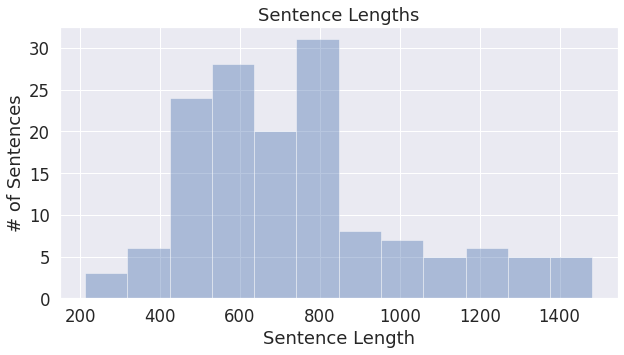

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Plot the distribution of comment lengths.
sns.distplot(lengths, kde=False, rug=False)

plt.title('Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentences')

In [208]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:

    # Reconstruct the sentence--otherwise `tokenizer` will interpret the list
    # of string tokens as having already been tokenized by BERT.
    sent_str = ' '.join(sent)

    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent_str,                  # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation = True,
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'][0])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'][0])

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
print('Masks:', attention_masks[0])

Original:  ['症例', 'は', '70', '歳', ',', '男性', '.', '血', '疾', 'を', '主訴', 'に', '当院', '紹介', 'と', 'な', 'り', ',', 'CT', '・', '気管支', '鏡', '検査', 'の', '結果', ',', '非', '小', '細胞', '肺癌', 'と', '診断', 'さ', 'れ', 'た', '.', 'その後', ',', '放射線', '化学療法', '(', '１', ' ', '+', ' ', 'CDDP', '療法', ')', 'が', '導入', 'さ', 'れ', ',', '2', 'コース', '施行', '後', 'の', '維持', '療法', 'として', 'デュルバルマブ', '療法', '(', '抗', 'PD', '－', 'L', '1', '抗体', '療法', ')', 'を', '行', 'っ', 'た', 'ところ', ',', '発熱', 'と', '炎症', '反応', '上昇', 'を', '認め', 'た', 'ため', '抗', 'PD', '－', 'L', '1', '抗体', '投与', '5日', '後', 'から', 'LVFX', '投与', 'を', '開始', 'し', 'た', '.', 'LVFX', '投与', '3口', '目', 'の', '採血', 'で', '肝', '機能障害', 'と', '炎症', '反応', 'の', '更なる', '上昇', 'を', '認め', 'た', 'ため', '造影', 'CT', 'を', '施行', 'し', 'た', 'ところ', ',', '肺癌', 'に', '対', 'する', '放射線', '治療', 'の', '照射', '範囲', 'に', '含まれ', 'る', '肝臓', '領域', 'に', '多発', 'する', '造影', '効果', 'が', '乏し', 'い', '小', '腫瘤', 'を', '認め', 'た', '.', '経過', 'から', '多発', '肝', '膿瘍', 'または', '肺癌', 'の', '多発', '肝', '転移', 'を', '疑', 'い', ',', '肝', '腫瘍'

In [209]:
# New labels for all of the input sentences.
new_labels = []

# The special label ID we'll give to "extra" tokens.
null_label_id = -100

# For each sentence...
for (sen, orig_labels) in zip(input_ids, labels):
    
    # Create a new list to hold the adjusted labels for this sentence.
    padded_labels = []

    # This will be our index into the original label list.
    orig_labels_i = 0 

    # For each token in the padded sentence...
    for token_id in sen:

        # Pull the value out of the tensor.
        token_id = token_id.numpy().item()

        # If `[PAD]`, `[CLS]`, or `[SEP]`...
        if (token_id == tokenizer.pad_token_id) or \
            (token_id == tokenizer.cls_token_id) or \
            (token_id == tokenizer.sep_token_id):
            
            # Assign it the null label.
            padded_labels.append(null_label_id)

        # If the token string starts with "##"...
        elif tokenizer.decode([token_id])[0:2] == '##':

            # It's a subword token, and not part of the original dataset, so
            # assign it the null label.
            padded_labels.append(null_label_id)

        # If it's not any of the above...
        else:
            
            # This token corresponds to one of the original ones, so assign it
            # it's original label.

            # Look up the label for this token.
            label_str = orig_labels[orig_labels_i]

            # Map the label to its ID, and assign it.
            padded_labels.append(label_map[label_str])

            # Increment our index into the original labels list.
            orig_labels_i += 1

    # If we did this right, then the new `padded_labels` list should match
    # the length of the tokenized sentence.
    assert(len(sen) == len(padded_labels))    

    # Store the updated labels list for this sentence.
    new_labels.append(padded_labels)



In [210]:
print('\nSentence:    ', sentences[2])
print('\nLabels:      ', labels[2])
print('\nBERT Tokens: ', tokenizer.tokenize(' '.join(sentences[2])))
print('\nToken IDs:   ', input_ids[2])
print('\nNew Labels:  ', new_labels[2])
print('\nMask:        ', attention_masks[2])



Sentence:     ['症例', 'は', '60', '歳', '代', '男性', ',', '当院', '耳鼻咽喉科', 'で', '喉頭', '癌', 'に', '対', 'し', '2', 'ndline', 'として', 'Nivolumab', ' ', '150', 'mg', 'を', '2', '週', '毎', 'に', '投与', '中', 'で', 'あ', 'っ', 'た', '.', '投与', '開始', '4', 'か月', '後', 'の', '採血', 'で', 'T', '－', 'bil', ' ', '0.81', 'mg', '/', 'dl', ',', 'AST', ' ', '91', 'U', '/', 'l', ',', 'ALT', ' ', '144', 'U', '/', 'l', ',', 'ALP', ' ', '1478', 'U', '/', 'l', ' ', 'γGT', ' ', '426', 'U', '/', 'l', 'と', '胆道', '系', '酵素', '優位', 'の', '肝', '障害', 'を', '認め', '消化器', '内科', 'に', '紹介', 'と', 'な', 'っ', 'た', '.', '37.6', '度', 'の', '発熱', 'の', '他', 'に', '自覚症状', 'は', 'な', 'く', ',', '腹部', '所見', 'に', '特記', '事項', 'は', '認め', 'な', 'かった', '.', '血液', '生化学', '検査', 'で', '各種', 'ウイルス', 'マーカー', '・', 'ANA', '・', 'AMA', '2', 'は', '陰性', 'で', 'IgG', '・', 'IgG', '4', 'は', '正常', '範囲', '内', 'で', 'あ', 'っ', 'た', '.', 'CT', 'で', '総', '胆', '管', '・', '左右', '肝', '管', 'の', 'びまん', '性', '拡張', '・', '壁', '肥厚', '及び', '胆嚢', '腫大', '・', '胆嚢', '壁', '肥厚', 'を', '認め', 'た', 'が', ',

In [211]:
# Convert the lists into PyTorch tensors.

# `input_ids` is a list of tensor arrays--stack them into a matrix with size
# [7,660  x  50].
pt_input_ids = torch.stack(input_ids, dim=0)

# `attention_masks` is a list of tensor arrays--stack them into a matrix with
# size [7,660  x  50].
pt_attention_masks = torch.stack(attention_masks, dim=0)

# Labels is a list of lists. Convert it into a tensor matrix with size 
# [7,660  x  50].
pt_labels = torch.tensor(new_labels, dtype=torch.long)


In [212]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(pt_input_ids, pt_attention_masks, pt_labels)

# Create a 80-20 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
val_size = 0

# Divide the dataset by randomly selecting samples.
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
test_dataset, val_dataset = random_split(test_dataset, [test_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} val samples'.format(val_size))
print('{:>5,} test samples'.format(test_size))
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))


  118 training samples
    0 val samples
   30 test samples
118
30
0


In [213]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )


In [214]:
# This is the number of labels in our dataset, so we will be doing 18-way classification (all labels plus our padding label)
len(label_map)

27

In [215]:
from transformers import T5Tokenizer, RobertaForTokenClassification, AdamW, RobertaConfig

tokenizer = T5Tokenizer.from_pretrained("rinna/japanese-roberta-base")
tokenizer.do_lower_case = True  # due to some bug of tokenizer config loading

model = RobertaForTokenClassification.from_pretrained("rinna/japanese-roberta-base",
    num_labels = 27, # The number of output labels--18 for our NER dataset
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# from transformers import BertForTokenClassification, AdamW, BertConfig

# # Load BertForTokenClassification 
# model = BertForTokenClassification.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
#     num_labels = len(label_map) + 1, # The number of output labels--18 for our NER dataset
#     output_attentions = False, # Whether the model returns attentions weights.
#     output_hidden_states = False, # Whether the model returns all hidden-states.
# )

# Tell pytorch to run this model on the GPU.
model.cuda()
# Load the AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate 
                  eps = 1e-8 # args.adam_epsilon 
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs 
epochs = 100

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)


Some weights of the model checkpoint at rinna/japanese-roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at rinna/japanese-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should prob

In [216]:
import time
import numpy as np
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [217]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertfortokenclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.TokenClassifierOutput
        result = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        loss = result.loss

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        

print("")
print("Training complete!")



======== Epoch 1 / 100 ========
Training...

  Average training loss: 2.35
  Training epcoh took: 0:00:01

======== Epoch 2 / 100 ========
Training...

  Average training loss: 1.91
  Training epcoh took: 0:00:01

======== Epoch 3 / 100 ========
Training...

  Average training loss: 1.84
  Training epcoh took: 0:00:01

======== Epoch 4 / 100 ========
Training...

  Average training loss: 1.80
  Training epcoh took: 0:00:01

======== Epoch 5 / 100 ========
Training...

  Average training loss: 1.80
  Training epcoh took: 0:00:01

======== Epoch 6 / 100 ========
Training...

  Average training loss: 1.75
  Training epcoh took: 0:00:01

======== Epoch 7 / 100 ========
Training...

  Average training loss: 1.72
  Training epcoh took: 0:00:01

======== Epoch 8 / 100 ========
Training...

  Average training loss: 1.74
  Training epcoh took: 0:00:01

======== Epoch 9 / 100 ========
Training...

  Average training loss: 1.73
  Training epcoh took: 0:00:01

======== Epoch 10 / 100 ========
Tra

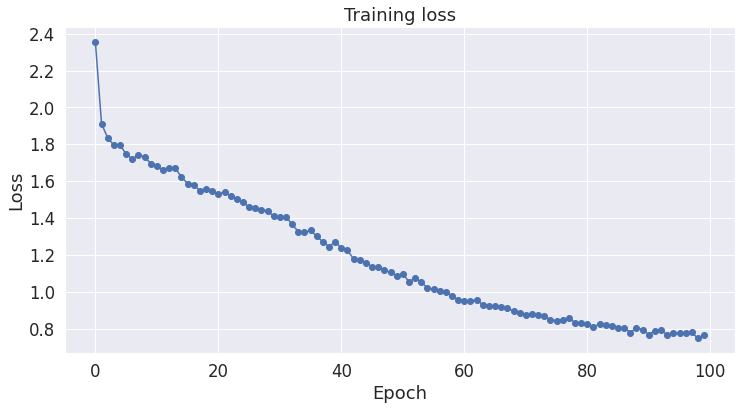

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()


In [221]:
# Prediction on test set

# Set the batch size.  
batch_size = 16  

# Create the DataLoader.
# prediction_data = TensorDataset(pt_input_ids, pt_attention_masks, pt_labels)
prediction_sampler = SequentialSampler(test_dataset)
prediction_dataloader = DataLoader(test_dataset, sampler=prediction_sampler, batch_size=batch_size)


print('Predicting labels for {:,} test sentences...'.format(len(pt_input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions, true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      result = model(b_input_ids, 
                      token_type_ids=None, 
                      attention_mask=b_input_mask,
                      return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')


Predicting labels for 148 test sentences...
    DONE.


In [222]:
from sklearn.metrics import f1_score

# First, combine the results across the batches.
all_predictions = np.concatenate(predictions, axis=0)
all_true_labels = np.concatenate(true_labels, axis=0)

print("After flattening the batches, the predictions have shape:")
print("    ", all_predictions.shape)

# Next, let's remove the third dimension (axis 2), which has the scores
# for all 18 labels. 

# For each token, pick the label with the highest score.
predicted_label_ids = np.argmax(all_predictions, axis=2)

print("\nAfter choosing the highest scoring label for each token:")
print("    ", predicted_label_ids.shape) 

# Finally, for the sake of scoring, we don't actually care about the different
# sentences--we just look at whether the model made correct predictions for the
# individual tokens.

# Eliminate axis 0, which corresponds to the sentences.
predicted_label_ids = np.concatenate(predicted_label_ids, axis=0)
all_true_labels = np.concatenate(all_true_labels, axis=0)

print("\nAfter flattening the sentences, we have predictions:")
print("    ", predicted_label_ids.shape)
print("and ground truth:")
print("    ", all_true_labels.shape)


After flattening the batches, the predictions have shape:
     (30, 50, 27)

After choosing the highest scoring label for each token:
     (30, 50)

After flattening the sentences, we have predictions:
     (1500,)
and ground truth:
     (1500,)


In [225]:
# Construct new lists of predictions which don't include any null tokens.
real_token_predictions = []
real_token_labels = []

# For each of the input tokens in the dataset...
for i in range(len(all_true_labels)):

    # If it's not a token with a null label...
    if not all_true_labels[i] == -100:
        
        # Add the prediction and the ground truth to their lists.
        real_token_predictions.append(predicted_label_ids[i])
        real_token_labels.append(all_true_labels[i])

print("Before filtering out `null` tokens, length = {:,}".format(len(all_true_labels)))
print(" After filtering out `null` tokens, length = {:,}".format(len(real_token_labels)))
print(real_token_predictions)


Before filtering out `null` tokens, length = 1,500
 After filtering out `null` tokens, length = 1,500
[10, 10, 6, 6, 10, 10, 10, 13, 13, 6, 10, 10, 4, 4, 25, 25, 25, 25, 25, 25, 25, 25, 25, 6, 6, 6, 10, 10, 10, 10, 10, 6, 6, 10, 10, 10, 10, 10, 6, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 25, 25, 25, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 25, 25, 25, 25, 25, 25, 25, 25, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 6, 6, 10, 10, 10, 25, 25, 25, 25, 25, 25, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 18, 18, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 6, 6, 10, 10, 13, 13, 6, 4, 4, 25, 25, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4, 10, 10, 10, 1

In [224]:
from sklearn.metrics import f1_score

# Calculate the F1 score. Because this is a multi-class problem, we have
# to set the `average` parameter. TODO - What does `micro` do?
f1 = f1_score(real_token_labels, real_token_predictions, average='micro') 

print ("F1 score: {:.2%}".format(f1))


F1 score: 56.27%
